In [87]:
#load model
import gensim.models as g
model_path="../doc2vec/model100.bin"
model = g.Doc2Vec.load(model_path)
import pandas as pd
data_path='../Data/Contest1244'
summary_stats=pd.read_csv(data_path+'/standings_statistics.csv',sep='\t',skiprows=1,header=None,names=['ParticipantID','Color','Rank','Country','ProblemA_id','ProblemA_memory','ProblemA_time','ProblemA_language','ProblemB_id','ProblemB_memory','ProblemB_time','ProblemB_language','ProblemC_id','ProblemC_memory','ProblemC_time','ProblemC_language','ProblemD_id','ProblemD_memory','ProblemD_time','ProblemD_language','ProblemE_id','ProblemE_memory','ProblemE_time','ProblemE_language','ProblemF_id','ProblemF_memory','ProblemF_time','ProblemF_language','ProblemG_id','ProblemG_memory','ProblemG_time','ProblemG_language'])
summary_stats.dropna(subset=['ProblemA_id','ProblemB_id', 'ProblemC_id'],inplace=True)
summary_stats.head()

,ParticipantID,Color,Rank,Country,ProblemA_id,ProblemA_memory,ProblemA_time,ProblemA_language,ProblemB_id,ProblemB_memory,...,ProblemE_time,ProblemE_language,ProblemF_id,ProblemF_memory,ProblemF_time,ProblemF_language,ProblemG_id,ProblemG_memory,ProblemG_time,ProblemG_language
0,28934535,blue,1,-,62466123,8,31,GNU C++11,62467959,104,...,249,GNU C++11,62476907,10804,46,GNU C++11,62480107,3924,420,GNU C++11
1,28925463,violet,2,China,62464793,16,30,GNU C++14,62468158,16,...,62,GNU C++14,62486766,3928,46,GNU C++14,62491796,3928,358,GNU C++14
2,28926600,violet,3,China,62464086,8,31,GNU C++11,62464148,828,...,31,GNU C++11,62497660,408,31,GNU C++11,62483655,4728,405,GNU C++11
3,28933479,blue,4,-,62466602,8,31,GNU C++11,62469867,12,...,498,GNU C++11,62497231,3148,46,GNU C++17,62495208,15664,967,GNU C++11
4,28935245,violet,5,China,62465923,12,31,GNU C++11,62471265,16,...,187,GNU C++11,62492999,796,46,GNU C++11,62499859,11756,109,GNU C++11


In [88]:
translation_summary=summary_stats[['ParticipantID','ProblemA_id','ProblemC_id','ProblemB_id']]
translation_summary.head()

,ParticipantID,ProblemA_id,ProblemC_id,ProblemB_id
0,28934535,62466123,62471680,62467959
1,28925463,62464793,62473970,62468158
2,28926600,62464086,62478090,62464148
3,28933479,62466602,62477877,62469867
4,28935245,62465923,62474334,62471265


In [89]:
def generate_name(row,column):
    return str(row['ParticipantID'])+'_'+row[column]

translation_summary['A_name']=translation_summary.apply (lambda row: generate_name(row,'ProblemA_id'), axis=1)
translation_summary['B_name']=translation_summary.apply (lambda row: generate_name(row,'ProblemB_id'), axis=1)
translation_summary['C_name']=translation_summary.apply (lambda row: generate_name(row,'ProblemC_id'), axis=1)

/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWa

In [90]:
translation_summary=translation_summary.dropna().sample(n=500)

In [91]:
def get_vector(model,text,start_alpha=0.01,infer_epoch=1000):
    return model.infer_vector(text, alpha=start_alpha, steps=infer_epoch)

In [92]:
import numpy as np
import os
contest='Contest1244'
def get_content(fname):
    data_path='../Data/'+(contest)
    f=open(os.path.join(data_path,'all_xml_simplified/'+fname+'.xml'),'r')
    txt=f.read()
    f.close()
    return txt.strip().split()

def generate_vec(row,problem):
    try:
        name=row[problem]
        content=get_content(name)
        vec=get_vector(model,content)
        return vec
    except:
        return None

In [93]:
A_vecs=translation_summary.apply(lambda row: generate_vec(row,'A_name'), axis=1)
print('A done')
B_vecs=translation_summary.apply(lambda row: generate_vec(row,'B_name'), axis=1)
#C_vecs=translation_summary.apply(lambda row: generate_vec(row,'C_name'), axis=1)
#D_vecs=translation_summary.apply(lambda row: generate_vec(row,'D_name'), axis=1)


A done


In [8]:
import os

f=open(os.path.join(data_path,'all_xml_simplified/28935245_62465923.xml'),'r')
txt_a=f.read()
g=open(os.path.join(data_path,'all_xml_simplified/28935245_62474334.xml'),'r')
txt_c=g.read()
h=open(os.path.join(data_path,'all_xml_simplified/28925463_62464793.xml'),'r')
xtx_a=h.read()
i=open(os.path.join(data_path,'all_xml_simplified/28925463_62473970.xml'),'r')
xtx_c=i.read()

In [9]:
txt_a

'pragma directive name name name name name finished pragma directive name name name name name finished include directive file finished define directive macro name finished value finished define directive macro name parameter_list parameter type name finished finished parameter type name finished finished parameter type name finished finished finished finished value finished define directive macro name parameter_list parameter type name finished finished parameter type name finished finished parameter type name finished finished finished finished value finished using namespace name finished finished typedef type name name name finished name finished typedef type name name argument_list type generic argument expr name finished finished argument expr name finished finished finished finished finished name finished typedef type name name finished name finished function template parameter_list parameter type name finished name finished finished finished specifier type name finished name para

In [10]:
txt_c

'pragma directive name name name name name finished pragma directive name name name name name finished include directive file finished define directive macro name finished value finished define directive macro name parameter_list parameter type name finished finished parameter type name finished finished parameter type name finished finished finished finished value finished define directive macro name parameter_list parameter type name finished finished parameter type name finished finished parameter type name finished finished finished finished value finished using namespace name finished finished typedef type name name name finished name finished typedef type name name argument_list type generic argument expr name finished finished argument expr name finished finished finished finished finished name finished typedef type name name finished name finished function template parameter_list parameter type name finished name finished finished finished specifier type name finished name para

In [11]:
xtx_a

'include directive file finished using namespace name finished finished function type name finished name parameter_list block decl_stmt decl type name finished name finished decl type ref prev name finished decl type ref prev name finished decl type ref prev name finished decl type ref prev name finished decl type ref prev name finished finished expr_stmt expr name operator name finished finished while condition expr name operator finished finished block expr_stmt expr name operator name operator name operator name operator name operator name finished finished decl_stmt decl type name finished name init expr ternary condition expr name operator name finished finished then expr name operator name operator literal type number finished finished else expr name operator name finished finished finished finished finished finished finished decl_stmt decl type name finished name init expr ternary condition expr name operator name finished finished then expr name operator name operator literal t

In [12]:
xtx_c

'include directive file finished using namespace name finished finished function type name finished name parameter_list block decl_stmt decl type name name finished name finished decl type ref prev name finished decl type ref prev name finished decl type ref prev name finished finished expr_stmt expr name operator name operator name operator name operator name finished finished for control init decl type name name finished name init expr literal type number finished finished finished finished condition expr name operator name finished finished incr expr name operator finished finished finished block if condition expr operator name operator name operator name operator operator name finished finished then block type pseudo continue finished finished finished decl_stmt decl type name name finished name init expr operator name operator name operator name operator operator name finished finished finished decl type ref prev name init expr name operator name operator name finished finished fi

In [13]:
X_A=get_vector(model,txt_a.strip().split())
X_C=get_vector(model,txt_c.strip().split())
Y_A=get_vector(model,xtx_a.strip().split())
Y_C=get_vector(model,xtx_c.strip().split())

In [14]:
X_A.shape

(100,)

In [16]:
from scipy import spatial
result = 1 - spatial.distance.cosine(X_A-X_C+Y_C, X_A)
result2=1 - spatial.distance.cosine(X_A-X_C+Y_C, Y_A)
print(result)
print(result2)

0.24808157980442047
0.6255837678909302


In [95]:
1 - spatial.distance.cosine(X_A, X_C)

0.9094702005386353

In [96]:
1 - spatial.distance.cosine(X_A, Y_C)

0.1536000370979309

In [97]:
1 - spatial.distance.cosine(Y_A, X_C)

0.13897062838077545

In [98]:
1 - spatial.distance.cosine(Y_A, Y_C)

0.6145637035369873

In [112]:
translation_summary.shape

(1000, 7)

In [129]:
summary_stats.shape

(1000, 31)

In [102]:
translation_summary.to_csv('translation_vec.csv',index=False)

In [133]:
play=translation_summary.sample(n=100, replace=False, random_state=1)
play.head()

,ParticipantID,ProblemA_id,ProblemC_id,ProblemB_id,A_name,B_name,C_name,A_vec,B_vec,C_vec,D_vec
507,28929904,62469085,NO,62477223,28929904_62469085,28929904_62477223,28929904_NO,"[-0.08125514, -0.37661126, 0.029546322, 0.1859...","[0.1261962, -0.28840122, -0.013485637, 0.15798...",None,None
818,28930063,62465870,-,62476063,28930063_62465870,28930063_62476063,28930063_-,"[-0.08194714, -0.24887857, 0.57016236, 0.02721...","[0.11434873, -0.3891947, 0.6832665, -0.2191865...",None,None
452,28913845,62465017,62477000,62470217,28913845_62465017,28913845_62470217,28913845_62477000,"[-0.1267573, -0.38610095, 0.073323935, 0.16539...","[-0.09175491, -0.20303325, 0.08635165, 0.26552...","[-0.22277893, -0.3875344, 0.23395582, 0.207285...",None
368,28895208,62467601,NO,62469511,28895208_62467601,28895208_62469511,28895208_NO,"[0.021988025, -0.24203631, 0.076747015, 0.0115...","[0.053717237, -0.0008431146, 0.053021137, 0.05...",None,None
242,28907862,62475646,NO,62477976,28907862_62475646,28907862_62477976,28907862_NO,"[-0.33135733, -0.19410284, 0.3181004, -0.01235...","[-0.30688453, -0.11905848, 0.31800467, -0.0359...",None,None


In [176]:
def get_translated_vectors(df,vec,col_a,col_b,n_samples):
    translated_vecs=[]
    sample_vecs=df.dropna(subset=[col_a,col_b]).sample(n=n_samples, replace=False)
    for ix,row in sample_vecs.iterrows():
        Y_a=row[col_a]
        Y_b=row[col_b]
        translated_vecs.append(vec-Y_a+Y_b)
    return translated_vecs

In [186]:
def obtain_translated_set(row,col_a,col_b,translation_summary,n_samples=100):
    if row[col_a] is None:
        return [None] * n_samples
    return get_translated_vectors(translation_summary,row[col_a],col_a,col_b,n_samples)

In [192]:
translated_col=translation_summary.apply (lambda row: obtain_translated_set(row,'A_vec','C_vec',translation_summary), axis=1)
translation_summary['translated_set']=translated_col

/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ParticipantID,ProblemA_id,ProblemC_id,ProblemB_id,A_name,B_name,C_name,A_vec,B_vec,C_vec,D_vec,translated_set
0,28934535,62466123,62471680,62467959,28934535_62466123,28934535_62467959,28934535_62471680,"[-0.044202138, -0.4283478, 0.117565386, 0.1355...","[-0.17143491, -0.18878877, -0.01847813, 0.1372...","[-0.43411395, -0.25371718, 0.46505305, 0.21757...",None,"[[0.24295063, -0.627554, -0.043181967, 0.11134..."
1,28925463,62464793,62473970,62468158,28925463_62464793,28925463_62468158,28925463_62473970,"[-0.33881015, -0.36599618, -0.0663212, 0.26939...","[-0.100761235, -0.3316756, 0.0237973, 0.101701...","[-0.070138805, -0.018509908, 0.12724714, 0.192...",None,"[[-0.3083062, -0.3094286, -0.07265282, 0.02643..."
2,28926600,62464086,62478090,62464148,28926600_62464086,28926600_62464148,28926600_62478090,"[-0.14476949, -0.120933644, -0.06732082, 0.100...","[0.16804552, -0.5084876, -0.109157905, 0.19862...",None,None,"[[0.06597629, -0.17863098, -0.07849556, 0.0400..."
3,28933479,62466602,62477877,62469867,28933479_62466602,28933479_62469867,28933479_62477877,"[-0.25717404, -0.22128768, 0.50915545, 0.39523...","[-0.16896072, -0.053353813, 0.51749986, 0.3093...","[-0.12867935, 0.1834438, 0.4528377, 0.13189082...",None,"[[-0.81643194, -0.2613505, 1.0438676, 0.236594..."
4,28935245,62465923,62474334,62471265,28935245_62465923,28935245_62471265,28935245_62474334,"[-0.18804535, -0.44178656, 0.42179662, 0.28983...","[-0.1489841, -0.19800639, 0.34635773, 0.223225...","[-0.20255451, -0.42666727, 0.44303602, 0.26884...",None,"[[-0.023712628, -0.5649766, 0.5417453, 0.20653..."


In [252]:
from scipy import spatial
import random
def compute_similarity(x,y):
    if x is None or y is None:
        return 0
    return 1 - spatial.distance.cosine(x,y)

def compute_similarity_rank(row,col_b,n_samples=20):
    ranks=[]
    translated_set=row['translated_set']
    for translated_vec in random.sample(translated_set,n_samples):
        comparison_sim=compute_similarity(translated_vec,row[col_b])
        rank=1
        for random_vec in translation_summary[col_b]:
            sim=compute_similarity(random_vec,translated_vec)
            if sim>comparison_sim:
                rank+=1
        ranks.append(rank)
    rank_sum=0
    for rank in ranks:
        rank_sum+=rank
    return (rank_sum/len(ranks))

In [253]:
av_sim_rank=translation_summary.sample(n=70).apply (lambda row: compute_similarity_rank(row,'C_vec'), axis=1)

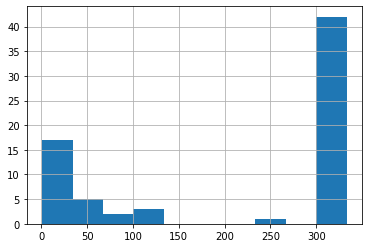

In [254]:
av_sim_rank.hist(bins=10)

In [ ]:
--------------------------------

In [99]:
translation_summary['A_vec']=A_vecs
translation_summary['B_vec']=B_vecs

In [100]:
translation_summary=translation_summary[['A_name','B_name','A_vec','B_vec']]

In [101]:
translation_summary.head()

,A_name,B_name,A_vec,B_vec
0,28935009_62465009,28935009_62473099,NaN,NaN
1,28893286_62463719,28893286_62466315,NaN,NaN
2,28897193_62464139,28897193_62470474,NaN,NaN
3,28935782_62464261,28935782_62470357,"[-0.19579342, 0.18394515, 0.033915326, 0.15637...","[-0.118528634, 0.0052260575, 0.06984823, 0.121..."
4,28929121_62467007,28929121_62470711,NaN,NaN


In [95]:
from scipy import spatial
import random
import math
def compute_similarity(x,y):
    if x is None or y is None:
        return 0
    return 1 - spatial.distance.cosine(x,y)

def convert_to_float_np(x):
    ans=[]
    try:
        for z in x[1:-1].split():
            ans.append(float(z))
        return np.array(ans)
    except:
        return np.array(x)
    

In [106]:
translation_summary=pd.read_csv('translation_vec.csv').dropna().sample(n=100)
a=translation_summary['A_vec'].apply(lambda s: convert_to_float_np(s))
b=translation_summary['B_vec'].apply(lambda s: convert_to_float_np(s))
translation_summary['A_vec']=a
translation_summary['B_vec']=b
AV_RANKS_1=[]
AV_RANKS_2=[]
for idx,row in translation_summary.iterrows():
    x_a=row['A_vec']
    x_b=row['B_vec']
    if x_a is None or x_b is None:
        continue
    av_rank_1=0
    av_rank_2=0
    cnt=0
    for ix,row2 in translation_summary.iterrows():
        if ix==idx:
            continue
        y_a=row2['A_vec']
        y_b=row2['B_vec']
        if y_a is None or y_b is None:
            continue
        z_1=x_a-y_a+y_b #should be closest to x_b
        z_2=x_a-x_b+y_b #should be closest to y_a
        SIM_1=compute_similarity(z_1,x_b)
        SIM_2=compute_similarity(z_2,y_a)
        rank_1=0
        rank_2=0
        for i,row3 in translation_summary.iterrows():
            check_a=row3['A_vec']
            check_b=row3['B_vec']
            sim_1=compute_similarity(z_1,check_b)
            sim_2=compute_similarity(z_2,check_a)
            if sim_1>SIM_1:
                rank_1+=1
            if sim_2>SIM_2:
                rank_2+=1
        cnt+=1
        av_rank_1+=rank_1
        av_rank_2+=rank_2
    AV_RANKS_1.append(av_rank_1/cnt)
    AV_RANKS_2.append(av_rank_2/cnt)

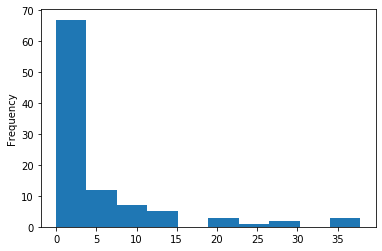

In [107]:
pd.Series(AV_RANKS_1).plot.hist()

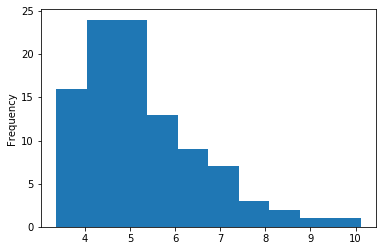

In [108]:
pd.Series(AV_RANKS_2).plot.hist()

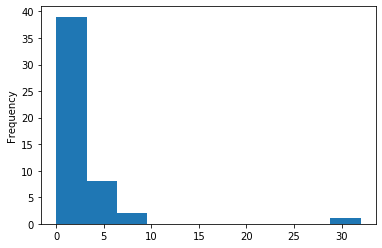

In [82]:
a=pd.Series(AV_RANKS_1)
a.plot.hist()